In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr
import numpy as np
import json
import requests


In [3]:
# Study data files
restaurants_df = pd.read_csv("Resources/clean_rest_data.csv")
top5_df = pd.read_csv("Resources/top_five_covid_counties.csv")
bott5_df = pd.read_csv("Resources/bottom_five_covid_counties.csv")

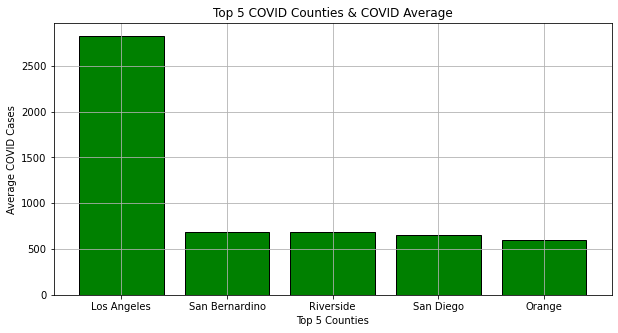

In [6]:
# Top 5 Cities and their Average COVID Cases
plt.figure(figsize = (10, 5))
plt.bar(top5_df["area"], top5_df["cases"], edgecolor='black', color = "g")
plt.title("Top 5 COVID Counties & COVID Average")
plt.xlabel("Top 5 Counties")
plt.ylabel("Average COVID Cases")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("output_data/Top_5_average_cases.png")
plt.show()

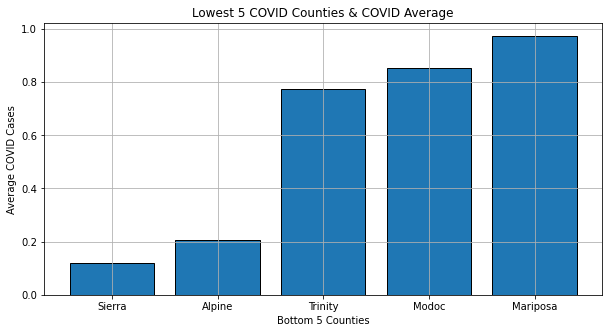

In [11]:
# Lowest 5 Cities and their Average COVID Cases
plt.figure(figsize = (10, 5))
plt.bar(bott5_df["area"], bott5_df["cases"], edgecolor='black')
plt.title("Lowest 5 COVID Counties & COVID Average")
plt.xlabel("Bottom 5 Counties")
plt.ylabel("Average COVID Cases")
plt.xticks(rotation = 0)
plt.grid()
plt.savefig("output_data/Bottom_5_average_cases.png")
plt.show()

In [6]:
restaurants_df["County_Name"].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

In [7]:
top5_df.head()

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Los Angeles,10257557.0,2827.767221,56.520190,42318.993318,3408.314031,2646.600000,52.886667,64130.890449
1,San Bernardino,2217398.0,689.532067,10.729216,6280.982183,762.178174,645.237778,10.157778,7080.688202
2,Riverside,2468145.0,680.745843,10.344418,6253.768374,763.886414,637.002222,9.780000,6785.769663
3,San Diego,3370418.0,654.147268,8.769596,9154.717149,659.316258,612.026667,8.204444,11002.424157
4,Orange,3228519.0,599.669834,11.681710,8046.567929,686.118040,561.180000,10.931111,9274.530899


In [8]:
restaurants_df.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alameda County,1,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Alameda County,1,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Alameda County,1,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Alameda County,1,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Alameda County,1,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"


In [9]:
rest_LA = restaurants_df[restaurants_df["County_Name"]== "Los Angeles County"].reset_index(drop = True)
rest_SB = restaurants_df[restaurants_df["County_Name"]== "San Bernardino County"].reset_index(drop = True)
rest_RS = restaurants_df[restaurants_df["County_Name"]== "Riverside County"].reset_index(drop = True)
rest_OC = restaurants_df[restaurants_df["County_Name"]== "Orange County"].reset_index(drop = True)

In [10]:
rest_LA = rest_LA.loc[:, ['County_Name', 'Action']]
rest_SB = rest_SB.loc[:, ['County_Name', 'Action']]
rest_RS = rest_RS.loc[:, ['County_Name', 'Action']]
rest_OC = rest_OC.loc[:, ['County_Name', 'Action']]

In [11]:
LA_open_rest_df = rest_LA.groupby(['Action']).count().reset_index()
SB_open_rest_df = rest_SB.groupby(['Action']).count().reset_index()
RS_open_rest_df = rest_RS.groupby(['Action']).count().reset_index()
OC_open_rest_df = rest_OC.groupby(['Action']).count().reset_index()

In [12]:
OC_open_rest_df

,Action,County_Name
0,Curbside/carryout/delivery only,90
1,Open with social distancing/reduced seating/en...,198
2,none,4


<h1>Citations Vs Avg Covid Cases </h1>

In [13]:
covid_data_df = pd.read_csv("Resources/covid19cases_test.csv")
covid_data_df.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,2021-04-25,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,146.0,-1.0,10474.0
1,2021-04-25,Alpine,County,1117.0,0.0,0.0,NaN,NaN,1.0,0.0,4.0
2,2021-04-25,Amador,County,38531.0,0.0,0.0,NaN,NaN,3.0,0.0,701.0
3,2021-04-25,Butte,County,217769.0,0.0,0.0,NaN,NaN,31.0,0.0,936.0
4,2021-04-25,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,5.0,0.0,155.0


In [14]:
restaurants_df.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alameda County,1,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Alameda County,1,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Alameda County,1,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Alameda County,1,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Alameda County,1,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"


In [15]:
covid_data_df = covid_data_df.loc[covid_data_df["area_type"]=="County",:]

In [16]:
avg_cases_by_county_df = covid_data_df.groupby(['area']).mean().reset_index()
avg_cases_by_county_df.head()

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Alameda,1685886.0,204.612827,2.973872,5509.685969,223.759465,191.471111,2.791111,5898.415730
1,Alpine,1117.0,0.206651,0.000000,4.329621,0.080178,0.193333,0.000000,2.657303
2,Amador,38531.0,8.650831,0.109264,254.271715,9.300668,8.095556,0.102222,190.404494
3,Butte,217769.0,27.812352,0.465558,466.910913,27.625835,26.020000,0.435556,512.095506
4,Calaveras,44289.0,4.921615,0.118765,88.138085,5.180401,4.604444,0.111111,86.401685


In [17]:
avg_cases_by_county_df = avg_cases_by_county_df.loc[:, ['area', 'cases']]
avg_cases_by_county_df.head()

,area,cases
0,Alameda,204.612827
1,Alpine,0.206651
2,Amador,8.650831
3,Butte,27.812352
4,Calaveras,4.921615


In [18]:
avg_cases_by_county_df['rest_citations']=""
avg_cases_by_county_df.head()

,area,cases,rest_citations
0,Alameda,204.612827,
1,Alpine,0.206651,
2,Amador,8.650831,
3,Butte,27.812352,
4,Calaveras,4.921615,


In [19]:
# Create a for loop to populate restaurant citations
for index, row in restaurants_df.iterrows():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-6ea4aff7b3e5>, line 3)

In [20]:
restaurants_df.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alameda County,1,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Alameda County,1,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Alameda County,1,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Alameda County,1,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Alameda County,1,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"


In [21]:
restaurants_df['County_Name'].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

In [22]:
rest_with_covid = restaurants_df[restaurants_df['Citation'].str.contains("COVID-19")].reset_index(drop = True)

In [23]:
rest_with_covid.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alpine County,3,5/22/2020 0:00,Restaurants,Open with social distancing/reduced seating/en...,Open with limitations,3,In effect,5/22/2020,5/22/2020,5.22.20 County variance - Coronavirus COVID-19...
1,Alpine County,3,5/23/2020 0:00,Restaurants,Open with social distancing/reduced seating/en...,Open with limitations,3,In effect,5/22/2020,5/22/2020,5.22.20 County variance - Coronavirus COVID-19...
2,Alpine County,3,5/24/2020 0:00,Restaurants,Open with social distancing/reduced seating/en...,Open with limitations,3,In effect,5/22/2020,5/22/2020,5.22.20 County variance - Coronavirus COVID-19...
3,Alpine County,3,5/25/2020 0:00,Restaurants,Open with social distancing/reduced seating/en...,Open with limitations,3,In effect,5/25/2020,5/25/2020,5.25.20 County variance - Coronavirus COVID-19...
4,Alpine County,3,5/26/2020 0:00,Restaurants,Open with social distancing/reduced seating/en...,Open with limitations,3,In effect,5/25/2020,5/25/2020,5.25.20 County variance - Coronavirus COVID-19...


In [24]:
rest_with_covid = rest_with_covid.groupby(['County_Name']).count().reset_index()

In [25]:
rest_with_covid.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alpine County,45,45,45,45,45,45,45,45,45,45
1,Amador County,55,55,55,55,55,55,55,55,55,55
2,Butte County,55,55,55,55,55,55,55,55,55,55
3,Calaveras County,53,53,53,53,53,53,53,53,53,53
4,Colusa County,49,49,49,49,49,49,49,49,49,49


In [26]:
rest_with_covid = rest_with_covid.loc[:, ['County_Name', 'Citation']]
rest_with_covid.head()

,County_Name,Citation
0,Alpine County,45
1,Amador County,55
2,Butte County,55
3,Calaveras County,53
4,Colusa County,49


In [27]:
rest_with_covid= rest_with_covid.rename(columns = {'County_Name': 'area'})
rest_with_covid.head()

,area,Citation
0,Alpine County,45
1,Amador County,55
2,Butte County,55
3,Calaveras County,53
4,Colusa County,49


In [28]:
len(rest_with_covid), len(avg_cases_by_county_df)

(57, 60)

In [29]:
rest_with_covid['area'] = rest_with_covid['area'].str.replace("County", '')

In [30]:
rest_with_covid.head()

,area,Citation
0,Alpine,45
1,Amador,55
2,Butte,55
3,Calaveras,53
4,Colusa,49


In [31]:
rest_with_covid['area'] = rest_with_covid['area'].str.replace(" ", '')

In [32]:
rest_area_lst = rest_with_covid['area'].tolist()
rest_cit_lst = rest_with_covid['Citation'].tolist()

In [33]:
rest_area_lst = ['Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San LuisObispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

In [34]:
rest_citation_df = pd.DataFrame({'area': rest_area_lst,
                            'citations': rest_cit_lst})

In [35]:
rest_citation_df.head(20)

,area,citations
0,Alpine,45
1,Amador,55
2,Butte,55
3,Calaveras,53
4,Colusa,49
5,Contra Costa,26
6,Del Norte,53
7,El Dorado,55
8,Fresno,45
9,Glenn,53


In [36]:
cases_vs_citations = avg_cases_by_county_df.merge(rest_citation_df, on = "area", how = "left")

In [37]:
cases_vs_citations.head()

,area,cases,rest_citations,citations
0,Alameda,204.612827,,NaN
1,Alpine,0.206651,,45.0
2,Amador,8.650831,,55.0
3,Butte,27.812352,,55.0
4,Calaveras,4.921615,,53.0


In [38]:
cases_vs_citations["citations"] = cases_vs_citations["citations"].replace(np.nan, 0)

In [39]:
cases_vs_citations.head()

,area,cases,rest_citations,citations
0,Alameda,204.612827,,0.0
1,Alpine,0.206651,,45.0
2,Amador,8.650831,,55.0
3,Butte,27.812352,,55.0
4,Calaveras,4.921615,,53.0


In [40]:
from scipy.stats import linregress

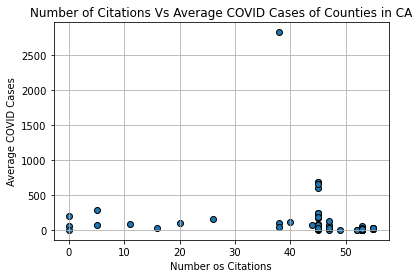

In [41]:
x_values = cases_vs_citations['citations']
y_values = cases_vs_citations['cases']
plt.title("Number of Citations Vs Average COVID Cases of Counties in CA")
plt.scatter(x_values,y_values, edgecolor='black')
plt.xlabel('Number os Citations')
plt.ylabel('Average COVID Cases')
plt.grid()
plt.savefig("output_data/Citations_vs_county_cases.png")
plt.show()

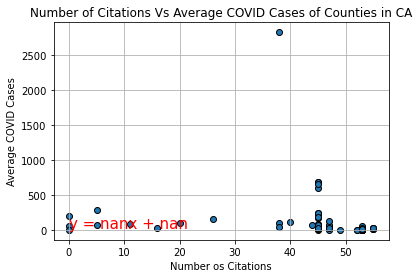

The r-value is: nan


In [42]:
# Plot 
x_values = cases_vs_citations['citations']
y_values = cases_vs_citations['cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Number of Citations Vs Average COVID Cases of Counties in CA")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Number os Citations')
plt.ylabel('Average COVID Cases')
plt.grid()
#plt.savefig("Plots/LinearReg_Lat_vs_Temp(northern hem).png")
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")


plt.show()